In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from itertools import combinations
import networkx as nx
from utils.cluster import cluster
from utils.recombinations import recombinations

In [2]:
conv = pd.read_csv('../Data/221121_sjogren_exclude_all_healthy_convergent.csv')
subject_id = {
    'PSO': 'S1',
    'YJH': 'S2',
    'WKM': 'S3',
    'KYB': 'S4',
    'HHJ': 'S5',
    'KJH': 'S6',
    'LCR': 'S7',
    'PSB': 'S8',
    'CKJ': 'S9',
    'JHO': 'S10',
    'YYS': 'S11',
    'KJY': 'S12',
    'KMJ': 'S13',
    'LYS': 'S14',
    'CJR': 'S15',
    'HKN': 'S16',
    'PSJ': 'S17',
    'KSK': 'S18',
    'LHS': 'S19',
    'KMO': 'S20'
}
conv['patients'] = conv['patients'].copy().apply(lambda x:  x.split('|'))
conv['patients'] = conv['patients'].apply(lambda x: [subject_id[i] for i in x])
conv

,v_call,j_call,cdr3_aa,patients,degree_of_convergence
0,IGHV4-59,IGHJ2,ARDRYCSGGSCFDWYFDL,"[S4, S1, S5, S7, S2, S3, S6]",7
1,IGHV3-7,IGHJ4,VKDGACGSDCYLN,"[S12, S4, S1, S3, S16, S6]",6
2,IGHV3-66,IGHJ3,PRGDFDI,"[S12, S4, S1, S3, S16, S6]",6
3,IGHV3-7,IGHJ4,ARVKRDGPLDY,"[S12, S4, S1, S3, S16, S6]",6
4,IGHV5-51,IGHJ5,ASSNYNWFDP,"[S15, S1, S20, S13, S8, S6]",6
...,...,...,...,...,...
3953,IGHV3-66,IGHJ4,VGYGGNSN,"[S8, S6]",2
3954,IGHV3-72,IGHJ4,ARVRDGGSQDC,"[S8, S6]",2
3955,IGHV3-21,IGHJ4,ARDEAMGY,"[S8, S6]",2
3956,IGHV3-23,IGHJ3,AKSLGDSEYDAFDV,"[S8, S6]",2


In [3]:
conv.iloc[463]

v_call                     IGHV3-66
j_call                        IGHJ6
cdr3_aa                  ARLHYYYMDI
patients                  [S18, S4]
degree_of_convergence             2
Name: 463, dtype: object

In [61]:
from utils.preprocessing import preprocessing
def unique_shared_clonotype(shared_clonotype):
    raw_datas = []
    for patient in shared_clonotype['patients']:
        df = pd.read_csv(f'../Data/new_sjogren_file/{patient}_add_d_gene.tsv', sep='\t')
        process = preprocessing(df)
        raw_datas.append(process().get_group((shared_clonotype['v_call'], shared_clonotype['j_call'], shared_clonotype['cdr3_aa'])))
    concat = pd.concat(raw_datas, keys = shared_clonotype['patients'])
    concat['isUnique'] = ~concat['sequence'].duplicated(keep=False)
    return concat

In [65]:
datas = []
for i in range(91):
    datas.append(unique_shared_clonotype(conv.iloc[i]))

In [66]:
concat_clone = pd.concat(datas, keys = conv.iloc[0:91]['v_call'] + '|' + conv.iloc[0:91]['j_call'] + '|' + conv.iloc[0:91]['cdr3_aa'])
concat_clone

sequence_id  duplicate_count  \
IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL S4  168902  Seq_168903                1   
                                  S1  12870    Seq_12871                2   
                                  S5  2865      Seq_2866               15   
                                      46582    Seq_46583                2   
                                      106909  Seq_106910                1   
...                                                  ...              ...   
IGHV3-48|IGHJ6|ARDCGEGYGMDV       S6  92697    Seq_92698                1   
IGHV4-34|IGHJ3|RLGGAYGDNYAFDT     S2  429050  Seq_429051                1   
                                  S10 325193  Seq_325194                1   
                                  S19 115392  Seq_115393                1   
                                  S14 104862  Seq_104863                1   

                                              frequency  \
IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL S4  168902   0.000001   
                                  S1  12870    0.000005   
                                  S5  2865     0.000019   
                                      46582    0.000003   
                                      106909   0.000001   
...                                                 ...   
IGHV3-48|IGHJ6|ARDCGEGYGMDV       S6  92697    0.000003   
IGHV4-34|IGHJ3|RLGGAYGDNYAFDT     S2  429050   0.000001   
                                  S10 325193   0.000001   
                                  S19 115392   0.000002   
                                  S14 104862   0.000003   

                                                                                       sequence  \
IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL S4  168902  CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...   
                                  S1  12870   CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...   
                                  S5  2865    CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...   
                                      46582   CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...   
                                      106909  CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...   
...                                                                                         ...   
IGHV3-48|IGHJ6|ARDCGEGYGMDV       S6  92697   TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...   
IGHV4-34|IGHJ3|RLGGAYGDNYAFDT     S2  429050  CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...   
                                  S10 325193  CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...   
                                  S19 115392  CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...   
                                  S14 104862  CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...   

                                                                                    sequence_aa  \
IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL S4  168902  TVSGGPISSYYWSWIRQSPGKGLEWIGFIHSSGRTNYNPSLKSRVA...   
                                  S1  12870   TVSGGSVSGYYWSWIRQPPGKGLEWIGYMYYSGSTNYNPSLKSRVT...   
                                  S5  2865    TVSGASISGYSWSWIRQPPGKGLEWIGFVHDSGITNYNPSLKSRVT...   
                                      46582   TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGNTNYNPSLKSRVS...   
                                      106909  TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGSTNYNPSLKSRVT...   
...                                                                                         ...   
IGHV3-48|IGHJ6|ARDCGEGYGMDV       S6  92697   AASGFTFSTYNLNWVRQAPGKGLEWLSYISHGSIAIYYADSVKGRF...   
IGHV4-34|IGHJ3|RLGGAYGDNYAFDT     S2  429050  VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...   
                                  S10 325193  VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...   
                                  S19 115392  VEGVSLNGLFCAWIRQSPGQGLEWIGDVNQSGGVNYNTTLRSRITI...   
                                  S14 104862  VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...   

                                 

In [81]:
clone_marked = pd.read_csv('../Data/sjogren_unique_sequences_marked.csv')
clone_marked

,clonotype,patient_id,sequence_id,duplicate_count,frequency,sequence,sequence_aa,sequence_alignment,germline_alignment,v_call,...,cdr2_aa,cdr3_aa,rev_comp,productive,v_cigar,d_cigar,j_cigar,v_alignment_length,v_alignment_mutation,isUnique
0,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S4,Seq_168903,1,0.000001,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,TVSGGPISSYYWSWIRQSPGKGLEWIGFIHSSGRTNYNPSLKSRVA...,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,IGHV4-59,...,IHSSGRT,ARDRYCSGGSCFDWYFDL,F,T,16=1X22=1X12=1X13=1X5=1X10=1X3=2X3=1X9=1X29=1X...,7=1X11=1X4=,50=,228,15,True
1,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S1,Seq_12871,2,0.000005,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,TVSGGSVSGYYWSWIRQPPGKGLEWIGYMYYSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,IGHV4-59,...,MYYSGST,ARDRYCSGGSCFDWYFDL,F,T,25=1X55=1X5=1X2=1X5=1X2=1X47=1X34=1X9=1X32=1X2=,7=1X16=,34=1X15=,228,10,True
2,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,Seq_2866,15,0.000019,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,TVSGASISGYSWSWIRQPPGKGLEWIGFVHDSGITNYNPSLKSRVT...,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,IGHV4-59,...,VHDSGIT,ARDRYCSGGSCFDWYFDL,F,T,14=1X10=1X6=2X14=1X8=1X14=1X10=1X1=1X2=1X2=1X9...,4=1X17=,50=,228,22,True
3,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,Seq_46583,2,0.000003,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGNTNYNPSLKSRVS...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,IGHV4-59,...,IHDSGNT,ARDRYCSGGSCFDWYFDL,F,T,25=1X7=1X5=1X8=1X23=1X8=1X6=1X2=1X9=1X6=1X23=1...,4=1X8=1X8=,50=,228,21,True
4,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,Seq_106910,1,0.000001,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,IGHV4-59,...,IHDSGST,ARDRYCSGGSCFDWYFDL,F,T,25=1X7=1X5=1X8=1X23=1X8=1X6=1X2=1X40=1X11=1X2=...,4=1X8=1X8=,50=,228,19,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7052,IGHV3-48|IGHJ6|ARDCGEGYGMDV,S6,Seq_92698,1,0.000003,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,AASGFTFSTYNLNWVRQAPGKGLEWLSYISHGSIAIYYADSVKGRF...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,IGHV3-48,...,ISHGSIAI,ARDCGEGYGMDV,F,T,26=2X4=1X1=1X41=1X14=2X1=1X6=1X1=1X50=1X55=2X1...,8=,6=1X14=1X23=1X3=,231,15,False
7053,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S2,Seq_429051,1,0.000001,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,True
7054,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S10,Seq_325194,1,0.000001,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,False
7055,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S19,Seq_115393,1,0.000002,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGDVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,True


In [82]:
clone_marked_not_unique = clone_marked[clone_marked['isUnique']==False]

In [83]:
clone_marked_not_unique

,clonotype,patient_id,sequence_id,duplicate_count,frequency,sequence,sequence_aa,sequence_alignment,germline_alignment,v_call,...,cdr2_aa,cdr3_aa,rev_comp,productive,v_cigar,d_cigar,j_cigar,v_alignment_length,v_alignment_mutation,isUnique
14,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S6,Seq_33630,2,0.000007,CACTGTCTCTGGTGGCTCCATCAGTGGTTATTCCTGGAGTTGGATC...,TVSGGSISGYSWSWIRQSPGQGLEWIGYIYHSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCATCAGTGGTTATTCCTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTATTCCTGGAGTTGGATC...,IGHV4-59,...,IYHSGST,ARDRYCSGGSCFDWYFDL,F,T,25=1X4=1X1=1X6=1X12=1X8=1X19=1X9=1X55=1X11=1X8...,22=,50=,228,15,False
15,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S6,Seq_80718,1,0.000003,CACTGTCTCTGGTGGCTCCATCAGTGGTTATTCCTGGAGTTGGATC...,TVSGGSISGYSWSWIRQSPGQGLEWIGYIYHSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCATCAGTGGTTATTCCTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTATTCCTGGAGTTGGATC...,IGHV4-59,...,IYHSGST,ARDRYCSGGSCFDWYFDL,F,T,25=1X4=1X1=1X6=1X12=1X8=1X19=1X9=1X55=1X11=1X8...,22=,50=,228,15,False
19,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S12,Seq_16082,3,0.000003,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,AASGFRLSDYWMSWVRQAPGKGLEWVANIKQDGSEKNYVDSVKGRF...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,IKQDGSEK,VKDGACGSDCYLN,F,T,16=2X3=1X3=3X11=1X44=1X24=1X51=1X13=1X10=1X18=...,7=1X11=,18=1X9=1X6=,231,18,False
20,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S12,Seq_307165,1,0.000001,TGCAGCCTCTGGATTCCACTTGAGTGATTATTGGATGAGTTGGGTC...,AASGFHLSDYWMSWVRQTPGKGLEWVANIKQDGSERNYVDSVKGRF...,TGCAGCCTCTGGATTCCACTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCACTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,IKQDGSER,VKDGACGSDCYLN,F,T,16=2X3=1X3=3X11=1X12=1X4=1X35=1X13=1X1=1X51=1X...,7=1X11=,18=1X9=1X6=,231,21,False
21,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S12,Seq_312844,1,0.000001,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,AASGFRLSDYWMSWVRQAPGKGLEWVANIKQDGSEKNYVDSVKGRF...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,IKQDGSEK,VKDGACGSDCYLN,F,T,16=2X3=1X3=3X11=1X44=1X24=1X51=1X13=1X10=1X12=...,7=1X11=,18=1X9=1X6=,231,19,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,IGHV3-48|IGHJ6|ARDCGEGYGMDV,S8,Seq_4480,1,0.000008,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACCGGGTC...,AASGFTFSTYNLNRVRQAPGKGLEWLSYISHGSIAIYYADSVKGRF...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACCGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACCGGGTC...,IGHV3-48,...,ISHGSIAI,ARDCGEGYGMDV,F,T,26=2X4=1X1=1X5=1X35=1X14=2X1=1X6=1X1=1X50=1X55...,8=,6=1X14=1X23=1X3=,231,16,False
7051,IGHV3-48|IGHJ6|ARDCGEGYGMDV,S6,Seq_21595,3,0.000010,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,AASGFTFSTYNLNWVRQAPGKGLEWLSYISHGSIAIYYADSVKGRF...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,IGHV3-48,...,ISHGSIAI,ARDCGEGYGMDV,F,T,26=2X4=1X1=1X41=1X14=2X1=1X6=1X1=1X50=1X55=2X1...,8=,6=1X14=1X23=1X3=,231,15,False
7052,IGHV3-48|IGHJ6|ARDCGEGYGMDV,S6,Seq_92698,1,0.000003,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,AASGFTFSTYNLNWVRQAPGKGLEWLSYISHGSIAIYYADSVKGRF...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,IGHV3-48,...,ISHGSIAI,ARDCGEGYGMDV,F,T,26=2X4=1X1=1X41=1X14=2X1=1X6=1X1=1X50=1X55=2X1...,8=,6=1X14=1X23=1X3=,231,15,False
7054,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S10,Seq_325194,1,0.000001,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,False


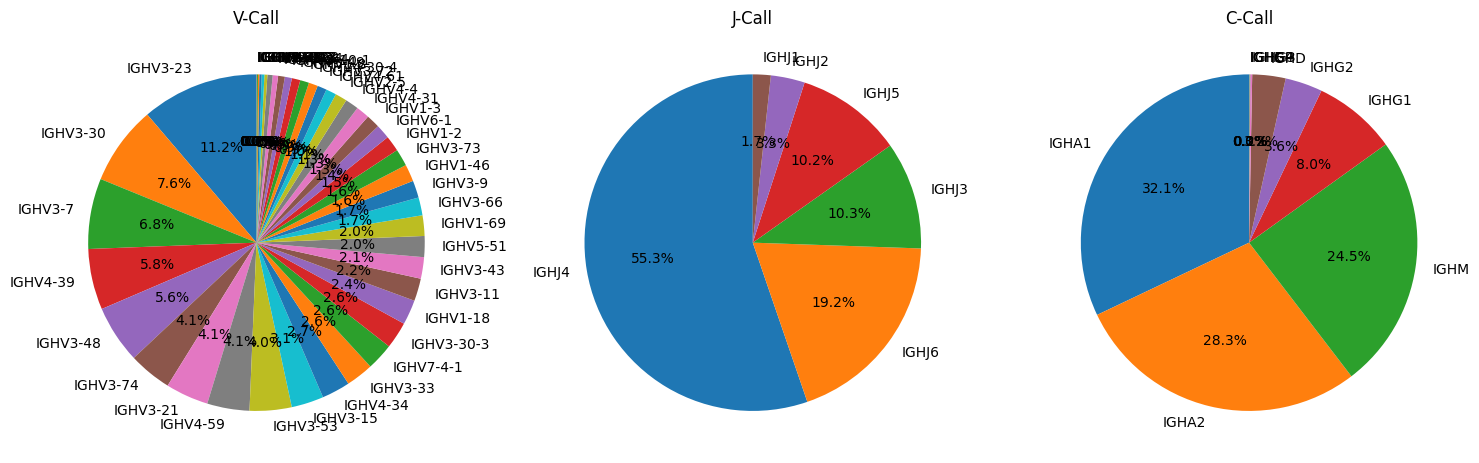

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(v_call.value_counts(), labels=v_call.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('V-Call')
axes[1].pie(j_call.value_counts(), labels=j_call.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('J-Call')
axes[2].pie(c_call.value_counts(), labels=c_call.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('C-Call')

plt.tight_layout()
plt.savefig('../Data/Example/pie_chart.png', dpi=300)

count    9132.000000
mean      298.831143
std        11.910628
min       246.000000
25%       291.000000
50%       298.000000
75%       307.000000
max       357.000000
Name: sequence_alignment, dtype: float64

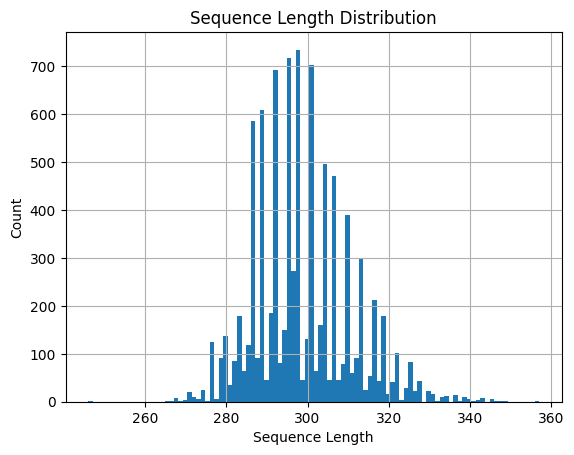

In [12]:
sequence_length = df['sequence_alignment'].str.len()
sequence_length.hist(bins=100)
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.savefig('../Data/Example/sequence_length.png', dpi=300)
sequence_length.describe()

count    9132.000000
mean       14.314936
std         3.702971
min         2.000000
25%        12.000000
50%        14.000000
75%        17.000000
max        29.000000
Name: cdr3_aa_len, dtype: float64

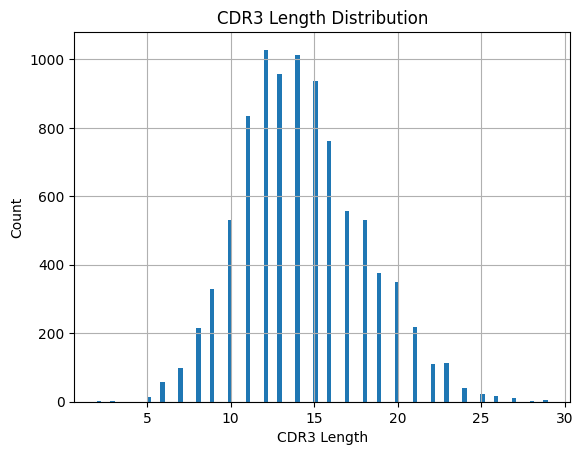

In [13]:
cdr3_length = df['cdr3_aa_len']
cdr3_length.hist(bins=100)
plt.title('CDR3 Length Distribution')
plt.xlabel('CDR3 Length')
plt.ylabel('Count')
plt.savefig('../Data/Example/cdr3_length.png', dpi=300)
cdr3_length.describe()

In [32]:
grouped_cluster_map = cluster(df)
map = grouped_cluster_map()

In [33]:
G = nx.Graph()

for i in range (len(map)):
    for seq, neighbors in map[i].items():
        G.add_node(seq)
        for neighbor in neighbors:
            G.add_edge(seq, neighbor)

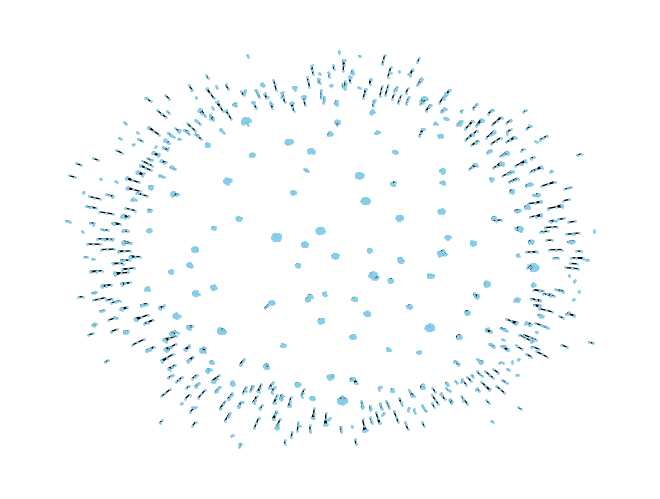

In [34]:
layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels=False, node_size = 1, node_color = "skyblue", edge_color = 'black', font_size = 1)
plt.draw()
plt.savefig('../Data/Example/Cluster_Graph_without_label.png', dpi=1000)

In [37]:
recombination_types = recombinations(df)
CSRtypes = recombination_types()

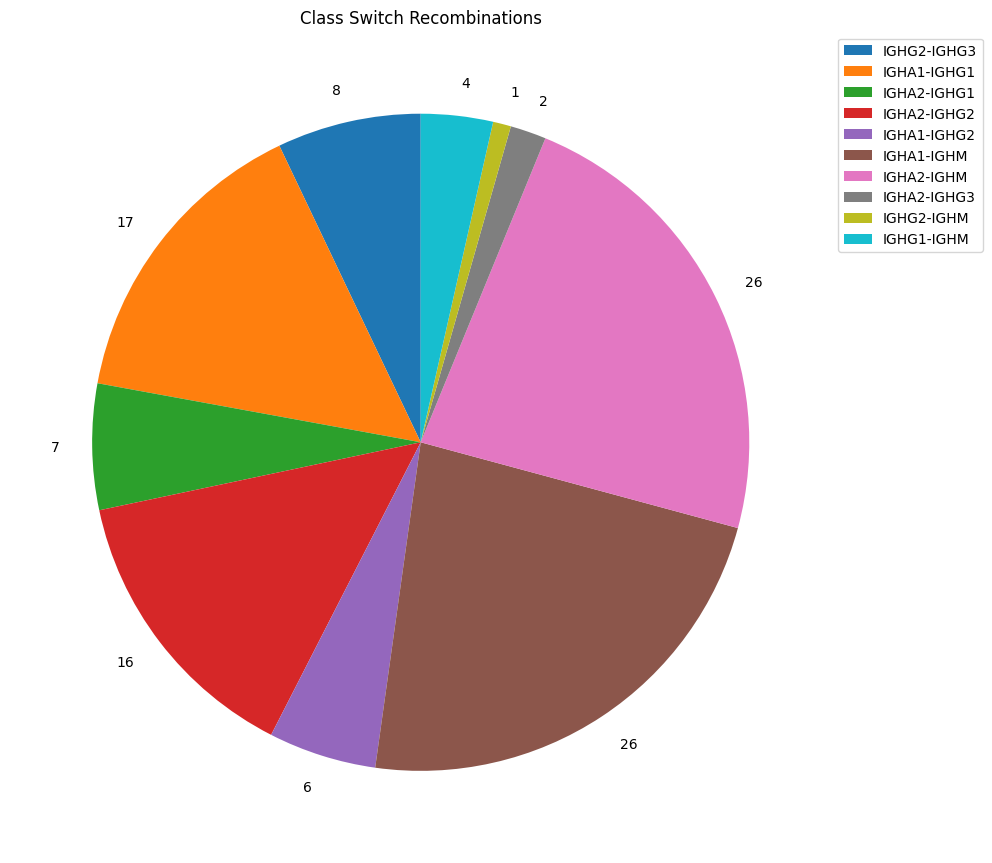

In [38]:
types = []
freq = []

for t, f in CSRtypes.items():
    types.append(t)
    freq.append(f)

plt.figure(figsize = (10,10))
plt.pie(freq, labels = freq, startangle=90)
plt.legend(labels = types, loc = 'upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.title('Class Switch Recombinations')
plt.savefig('../Data/Example/CSR_types.png', dpi=300)
